# Исследование рынка игр для построения стратегии

Данные:

информация об играх, платформах, их дате выпуска, рейтингу, продажам, отзывам пользователей и криттиков. Данные собраны из разныю источников. Таблица содержит игры, созданные до (включительно) 2016 года.

Цель:

Выделить закономерности. Определить критерии успешных игр. На основе выводов сформулировать стратегию на 2017 год для интернет магазина по продаже игр.

Ход:
1. Загрузка и обзор данных
2. Обработка данных: устранение пропусков, приведение к нужному типу, удаление дубликатов
3. Выявление общих закономерностей и временного промежутка для дальнейшего анализа
4. Анализ отдельных паттернов; анализ по категориям
5. Проверка гипотез
6. Общий вывод

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib.pyplot import figure

1. Выгрузка данных

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


пропуски присутсвуют в имени (2), годе выпуска, жанре (2), оценке критиков и пользователей, рейтинге. Возможно стоит поменять формат у даты выпуска и оценки пользователей

2. Обратобка данных

In [ ]:
df.columns = df.columns.str.lower()
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [ ]:
print('Число дубликатов', df.duplicated().sum())

Число дубликатов 0


name genre

In [ ]:
print('Уникальные имена игр', df.name.unique())

Уникальные имена игр ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


Пропуски в имени игры:

In [ ]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


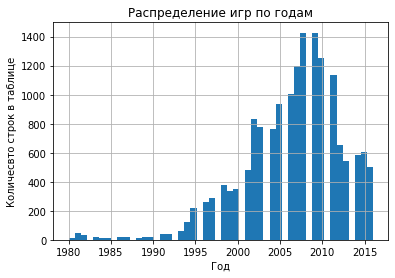

In [ ]:
df.year_of_release.hist(bins = 50)
plt.title('Распределение игр по годам')
plt.ylabel('Количесвто строк в таблице')
plt.xlabel('Год')
plt.show()

Игры создавались еще до 1993 года, то есть такое вполне возможно. Однако у этих двух игр нет жанра и каких-либо оценок. Решение - удалить

In [ ]:
df = df[df['name'].notna()]

Игра и платформа должны однозначно определять строку

In [ ]:
print('Уникальных пар имя-платформа', df.groupby(['name', 'platform'], as_index=False).agg({'genre':'first'}).shape[0])
print('Всего строк', df.shape[0])

Уникальных пар имя-платформа 16709
Всего строк 16713


Имя-платформа не определяют однозначно строчку, разберёмся в чём дело

In [ ]:
dupl = df[df.duplicated(subset=['name', 'platform']) == True]

In [ ]:
x = dupl['name'].unique()
y = dupl['platform'].unique()

In [ ]:
df.query('name in @x and platform in @y').sort_values(['name', 'platform'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Данные по игре и платформе совпадают по рейтингам. По продажам разлиячия у всех, а году - у Need for Speed. Непонятно, с чем связано такое различие, возможно данные собирались из разных источников. Вряд ли игры с одниковыми названиями, рейтингами на одной платформе различны. Уберем дубликаты, оставим первую копию. (Одна из идей: если в данных по продажам указаны нули, то источник, откуда их брали просто не знает про продажи и можно было бы заменить на максимльное значение рейтинга. Но тут данные по отличающимся продажам не равны нулям, также есть различия по годам)

In [ ]:
df = df.drop_duplicates(subset=['name', 'platform'], keep='first')

year_of_release

Различные года выпуска игры:

In [ ]:
df.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [ ]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим на произвольную игру с пропуском в дате. Заметка: можно дату вытаскивать из названия игры

In [ ]:
df[df.name == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [ ]:
df.merge(df.groupby('name', as_index=False).agg({'year_of_release':'min', 'platform':'first'}), on='name').query('year_of_release_x != year_of_release_y')

,name,platform_x,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y,platform_y
2,Super Mario Bros.,GB,1999.0,Platform,3.40,1.30,0.15,0.22,NaN,NaN,NaN,1985.0,NES
6,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,1988.0,GB
20,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2013.0,PS3
21,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,2013.0,PS3
22,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,2013.0,PS3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16400,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,NaN,PC
16411,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,NaN,DS
16451,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,PS3
16529,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN,PS3


Дата выхода игры не привязана к названию. Угадать мы её не сможем. С другой стороны, для дальнейшего анализа дата выхода может хорошо разделить пользователей на группы. Игра 1990ых это одно, а 2010ых - другое

Решение: заменить даты на медианные значения по названию игры. Так мы покажем, что игра относительно новая, или старая

In [ ]:
df.groupby('name', as_index=False).agg({'platform':'count'}).query('platform > 1')['name'].unique()

array([" Frozen: Olaf's Quest", '007: Quantum of Solace',
       '007: The World is not Enough', ..., "nail'd",
       'pro evolution soccer 2011', 'uDraw Studio: Instant Artist'],
      dtype=object)

In [ ]:
for n in df.groupby('name', as_index=False).agg({'platform':'count'}).query('platform > 1')['name'].unique():
    df.loc[(df['year_of_release'].isna()) & (df['name'] == n), 'year_of_release'] = df.loc[df['name'] == n, 'year_of_release'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Посмотрим, какие года получились после такой замены:

In [ ]:
df['year_of_release'].unique()

array([2006. , 1985. , 2008. , 2009. , 1996. , 1989. , 1984. , 2005. ,
       1999. , 2007. , 2010. , 2013. , 2004. , 1990. , 1988. , 2002. ,
       2001. , 2011. , 1998. , 2015. , 2012. , 2014. , 1992. , 1997. ,
       1993. , 1994. , 1982. , 2016. , 2003. , 1986. , 2000. , 1995. ,
       1991. , 1981. , 1987. , 1980. , 1983. ,    nan, 2002.5, 2013.5,
       2005.5, 2001.5])

In [ ]:
df['year_of_release'] = df['year_of_release'].round().astype('Int64')

Игры, по которым были данные за другие даты заполнили медианными значениями. Про остальные ничего сказать нельзя

score

Оценки критиков:

In [ ]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оценки пользователей:

In [ ]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оценки критиков по стобальной шкале, а пользователей - по 10ти бальной. Не будем приводить к одной шкале.

In [ ]:
df[df.user_score == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tdb - to be determined видимо служебная пометка, нам ничего не говорит о рейтинге, поэтому заменим его на пропуски.

In [ ]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
df['user_score'] = df['user_score'].apply(lambda x: x if x != 'tbd' else None)

In [ ]:
df['user_score'] = df['user_score'].astype('float')

In [ ]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16563 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   Int64  
 9   user_score       7586 non-null   float64
 10  rating           9945 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


Рейтинг критиков и особенно пользователей скорее всего зависит не только от игры, но и от платформы. Например, на разных платформах могут быть разные баги и особенности управления. Поэтому тут пропуски заполнять не будем. Поэтому по имеющемуся названию игры не будем заполнять пробелы на других платформах

In [ ]:
name_rating = df.sort_values('rating').groupby('name').agg({'rating':'first'}).join(df.sort_values('rating').groupby('name').agg({'rating':'last'}), rsuffix='_x')

In [ ]:
name_rating.query('rating.notna() and rating != rating_x')

,rating,rating_x
name,,
Astro Boy: The Video Game,E,E10+
Avatar: The Last Airbender,E,E10+
Barnyard,E,E10+
Batman Begins,E10+,T
Batman: Rise of Sin Tzu,E,T
...,...,...
X2: Wolverine's Revenge,E,T
Xiaolin Showdown,E,E10+
Young Justice: Legacy,E10+,T


На разных платформах может быть разный рейтинг у одной игры, кроме этого есть неявные дубликаты, из Википедии: «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")

Проверим какие вообще рейтинги бывают на платформах

In [ ]:
df.pivot_table(columns=['rating'], index=['platform'], values='name', aggfunc='count')

rating,AO,E,E10+,EC,K-A,M,RP,T
platform,,,,,,,,
3DS,NaN,92.0,76.0,NaN,NaN,12.0,NaN,48.0
DC,NaN,3.0,NaN,NaN,NaN,1.0,NaN,10.0
DS,NaN,876.0,259.0,2.0,NaN,10.0,NaN,126.0
GBA,NaN,426.0,25.0,NaN,NaN,7.0,NaN,64.0
GC,NaN,230.0,31.0,1.0,NaN,38.0,NaN,169.0
PC,NaN,138.0,76.0,2.0,2.0,256.0,3.0,296.0
PS,NaN,116.0,NaN,NaN,1.0,20.0,NaN,71.0
PS2,NaN,556.0,125.0,1.0,NaN,223.0,NaN,576.0
PS3,NaN,210.0,139.0,NaN,NaN,265.0,NaN,336.0


In [ ]:
df[df['name'] == 'Batman Begins']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3591,Batman Begins,PS2,2005,Action,0.27,0.21,0.0,0.07,64,7.3,T
7433,Batman Begins,XB,2005,Action,0.16,0.04,0.0,0.01,65,7.1,T
8313,Batman Begins,GBA,2005,Action,0.12,0.05,0.0,0.00,61,6.9,E10+
8922,Batman Begins,GC,2005,Action,0.11,0.03,0.0,0.00,66,7.2,T


Гипотеза о том, что на платформах может просто не быть какой-то категории рейтинга отвергается: на GBA присутсвует как T так и E10+, непонятно тогда, почему на дургих платформах рейтпнг T

Решение: заменить K-A на E. Пропуски заменить просто на какой-то рейтинг у игры с такми же названием.

In [ ]:
df['rating'] = df['rating'].str.replace('K-A', 'E')

In [ ]:
for n in df.groupby('name', as_index=False).agg({'platform':'count'}).query('platform > 1')['name'].unique():
    df.loc[(df['rating'].isna()) & (df['name'] == n), 'rating'] = df.loc[df['name'] == n, 'rating'].iloc[0]



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16563 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   Int64  
 9   user_score       7586 non-null   float64
 10  rating           10210 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


In [ ]:
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16709.000000,16709.000000,16709.000000,16709.000000
mean,0.263305,0.145039,0.077642,0.047347
std,0.813635,0.503411,0.308906,0.186763
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Максимальное значение очень сильно отличается от 75-персентиля по всем параметрам

In [ ]:
df[(df.na_sales > 20) | (df.eu_sales > 10) | (df.jp_sales > 3) | (df.other_sales > 5)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN


Странные значения, однако идём в интернет, википедия действительно приводит такие цифры, тут нет ошибки в обработке данных. Это действительно самые успешные игры. Для стратегии на 2017 год при действующей платформе эти игры действительно будут показывать выдающиеся на общем фоне результаты. Однако игра Wii Sports разительно отличается даже от успешного успеха. Смотрим информацию о ней, эта игра вышла одновременно вместе с приставкой Wii, то есть является базовой игрой, демонстрирующей возможности приставки. Для нашего магазина эта игра не несёт смысла. Удалим её.

In [ ]:
df = df[(df.name != 'Wii Sports') & (df.platform != 'Wii')]

In [ ]:
df['na_sales_total'] = df['na_sales'].sum()
df['eu_sales_total'] = df['eu_sales'].sum()
df['jp_sales_total'] = df['jp_sales'].sum()

In [ ]:
print('na total:', df['na_sales'].sum())
print('eu total:', df['eu_sales'].sum())
print('jp total:', df['jp_sales'].sum())

na total: 3902.67
eu total: 2161.2500000000005
jp total: 1227.99


In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df = df.reset_index(drop=True)

Вывод: больше всего продаж в Северной Америке, затем в Европе, после в Японии
- были удалены две строки с пропусками названия игры и жанра
- год игры переведён в целое число. Часть пропусков с годом игры было заменено на медианное значение по другим строчкам с этой игрой
- из возростного рейтинга K-A было заменено на E, было убрано часть пропусков на одно из значений игр с таким же названием
- в пользовательском рейтинге tbd был заменен на None, рейтинг был переведен в числовой формат
- рейтинг критиков был переведён в целые числа

Судя по наличию дубликатов с названием игр и платформой, данные брались из разных мест. Во время объединения могли произойти как накладки, так и потеря данных. Другая причина - данные даны за 30 лет, видимо с зарождения индустрии, особенно на начальных этапах вряд ли были универсальные требования хранения информации. Например, платформы могли просто не хранить информацию о дате создания игры, или на платформах могла быть просто не реализована система отзывов/рейтинга. Например, Entertainment Software Rating Board появилась только в 1994, маркировать игры, которые вышли из продажи явно не имело никакого смысла

3.

Анализ года выпуска

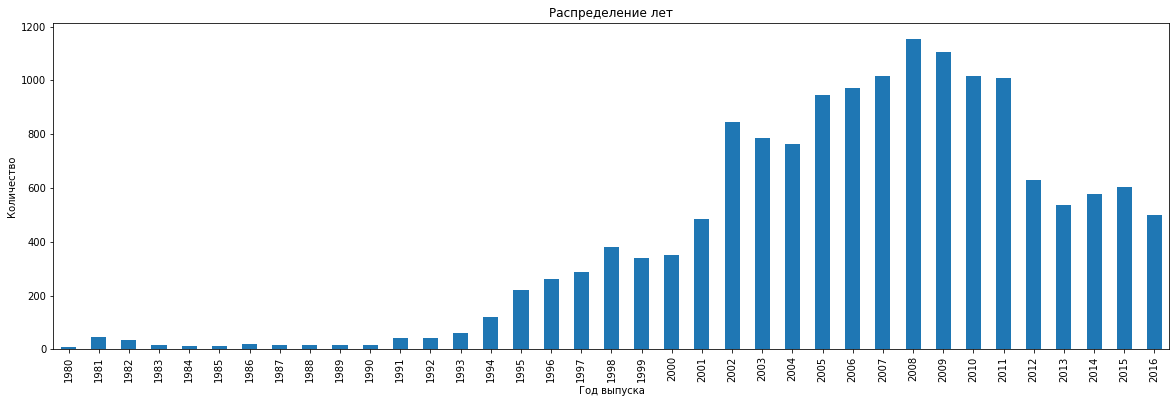

In [ ]:
plt.figure(figsize=(20, 6))
df[df.year_of_release.notna()]['year_of_release'].value_counts().sort_index().plot.bar()
plt.title('Распределение лет')
plt.ylabel('Количество')
plt.xlabel('Год выпуска')
plt.show()

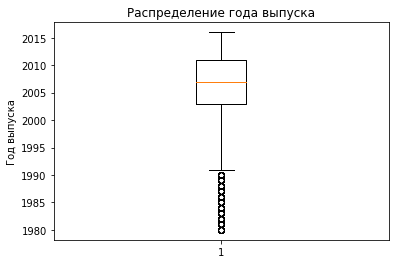

In [ ]:
plt.boxplot(df[df.year_of_release.notna()]['year_of_release'])
plt.title('Распределение года выпуска')
plt.ylabel('Год выпуска')
plt.xlabel('')
plt.show()

In [ ]:
df['year_of_release'].describe()

count    15262.000000
mean      2006.279387
std          6.044604
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64

В таблице приведены данные за 36 лет. За это время с игровой индустрией прошли колоссальные изменения: изменилось качество графики, возможностей, потребители. Пока уберём данные, ниже 25%-персентиля

In [ ]:
df = df[df.year_of_release >= 2003]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11605 entries, 3 to 15388
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11605 non-null  object 
 1   platform         11605 non-null  object 
 2   year_of_release  11605 non-null  Int64  
 3   genre            11605 non-null  object 
 4   na_sales         11605 non-null  float64
 5   eu_sales         11605 non-null  float64
 6   jp_sales         11605 non-null  float64
 7   other_sales      11605 non-null  float64
 8   critic_score     6282 non-null   Int64  
 9   user_score       6044 non-null   float64
 10  rating           7807 non-null   object 
 11  na_sales_total   11605 non-null  float64
 12  eu_sales_total   11605 non-null  float64
 13  jp_sales_total   11605 non-null  float64
 14  total_sales      11605 non-null  float64
dtypes: Int64(2), float64(9), object(4)
memory usage: 1.4+ MB


Рассмотрим платформы

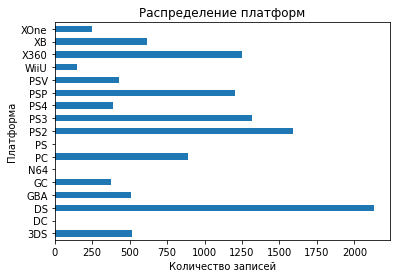

In [ ]:
df['platform'].value_counts().sort_index().plot.barh()
plt.title('Распределение платформ')
plt.xlabel('Количество записей')
plt.ylabel('Платформа')
plt.show()

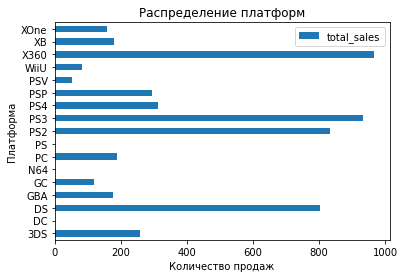

In [ ]:
df.groupby('platform').agg({'total_sales':'sum'}).plot.barh()
plt.title('Распределение платформ')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11605 entries, 3 to 15388
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11605 non-null  object 
 1   platform         11605 non-null  object 
 2   year_of_release  11605 non-null  Int64  
 3   genre            11605 non-null  object 
 4   na_sales         11605 non-null  float64
 5   eu_sales         11605 non-null  float64
 6   jp_sales         11605 non-null  float64
 7   other_sales      11605 non-null  float64
 8   critic_score     6282 non-null   Int64  
 9   user_score       6044 non-null   float64
 10  rating           7807 non-null   object 
 11  na_sales_total   11605 non-null  float64
 12  eu_sales_total   11605 non-null  float64
 13  jp_sales_total   11605 non-null  float64
 14  total_sales      11605 non-null  float64
dtypes: Int64(2), float64(9), object(4)
memory usage: 1.4+ MB


In [ ]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['total_sales'] = df['total_sales'].astype(float)

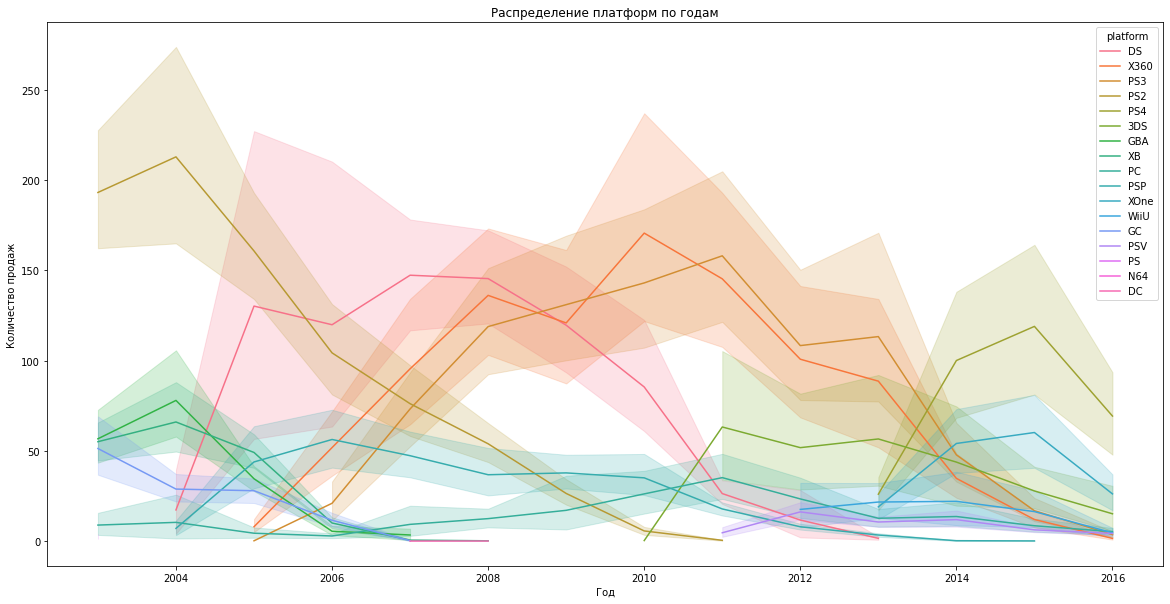

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='year_of_release', y='total_sales', estimator='sum', hue='platform')
plt.title('Распределение платформ по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

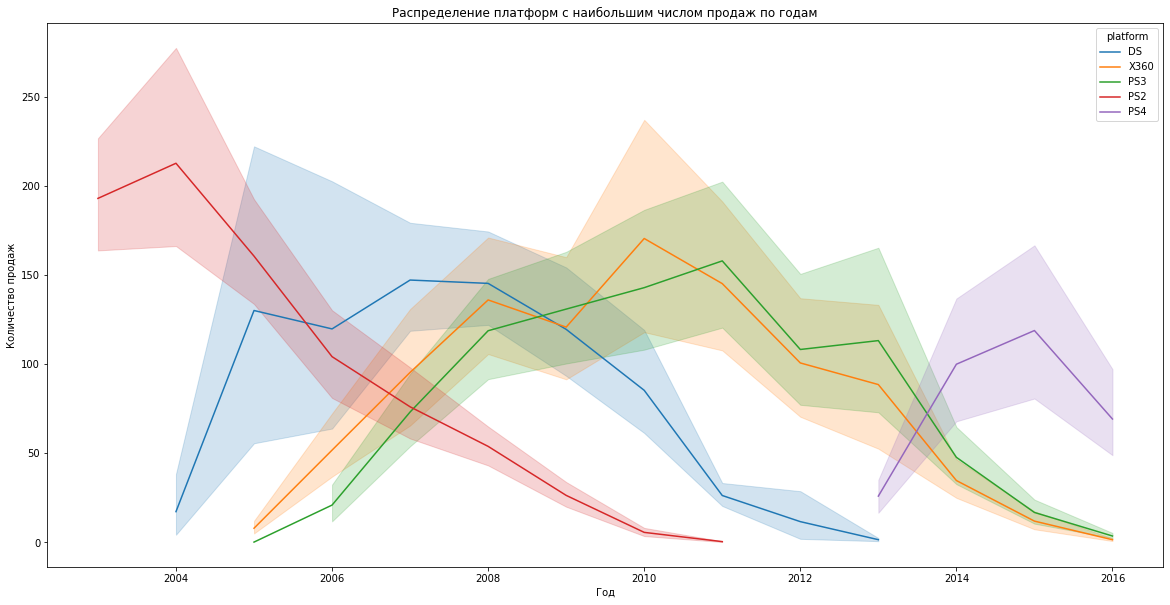

In [ ]:
dummy = df.groupby("platform", as_index=False).agg({"total_sales":"sum"}).sort_values('total_sales', ascending=False).head(5)['platform']
plt.figure(figsize=(20,10))
sns.lineplot(data=df.query('platform in @dummy'), x='year_of_release', y='total_sales', estimator='sum', hue='platform')
plt.title('Распределение платформ с наибольшим числом продаж по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

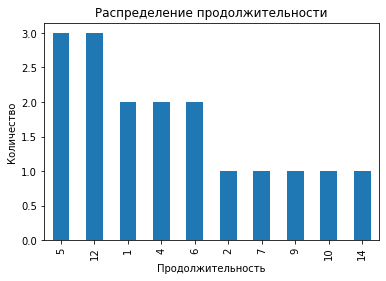

In [ ]:
platform_year = df.groupby('platform', as_index=False).agg({'year_of_release':['min', 'max']})
platform_year.columns = ['platform', 'min', 'max']
platform_year['duration'] = platform_year['max'] - platform_year['min'] + 1
platform_year['duration'].value_counts().plot.bar()
plt.title("Распределение продолжительности")
plt.ylabel('Количество')
plt.xlabel('Продолжительность')
plt.show()

In [ ]:
platform_year['duration'].describe()

count    17.000000
mean      6.764706
std       4.070157
min       1.000000
25%       4.000000
50%       6.000000
75%      10.000000
max      14.000000
Name: duration, dtype: float64

In [ ]:
platform_year

,platform,min,max,duration
0,3DS,2010,2016,7
1,DC,2007,2008,2
2,DS,2004,2013,10
3,GBA,2003,2007,5
4,GC,2003,2007,5
5,N64,2004,2004,1
6,PC,2003,2016,14
7,PS,2003,2003,1
8,PS2,2003,2011,9
9,PS3,2005,2016,12


В среднем платформы, на которых старшая игра вышла не раньше 2003года, живут 7 лет. 75%-персентиль - 10 лет, однако различных платформ не так уж и много (17)

In [ ]:
df.shape[0]

11605

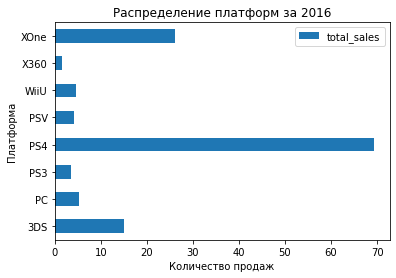

In [ ]:
df[df.year_of_release == 2016].groupby('platform').agg({'total_sales':'sum'}).plot.barh()
plt.title('Распределение платформ за 2016')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

На 2016 год по количеству продаж лидирует PS4, затем идёт XOne и 3DS

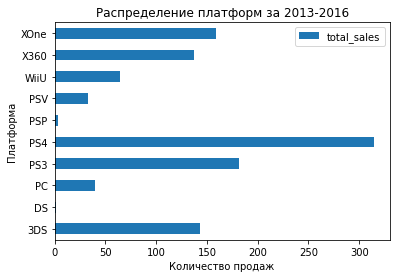

In [ ]:
df[df.year_of_release >= 2013].groupby('platform').agg({'total_sales':'sum'}).plot.barh()
plt.title('Распределение платформ за 2013-2016')
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

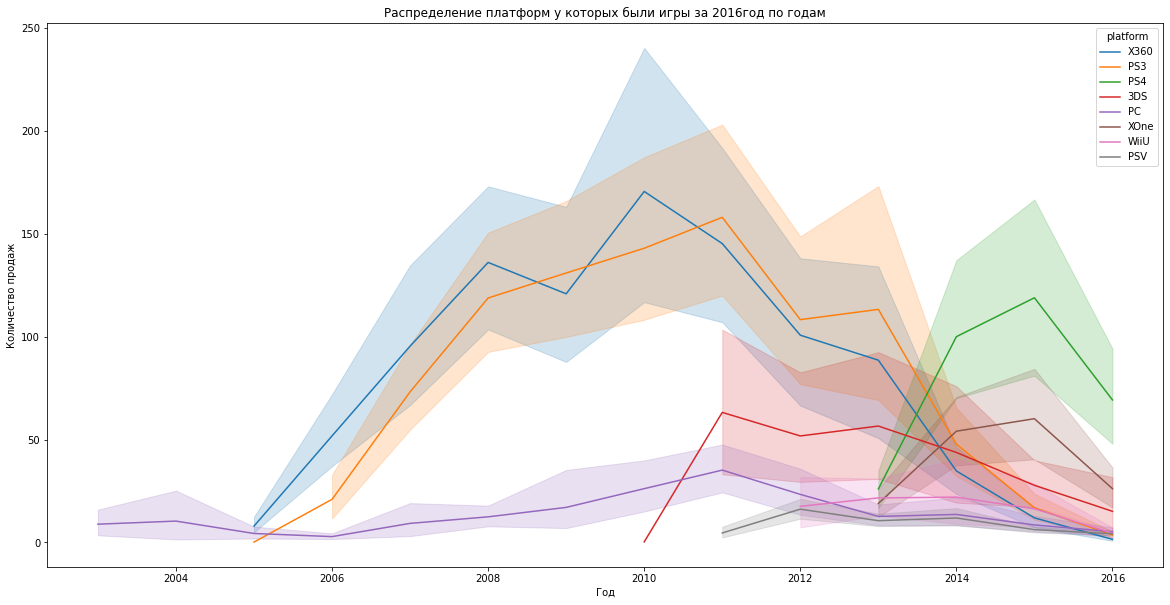

In [ ]:
platforms = df[df.year_of_release == 2016].platform
dummy = df.query('platform in @platforms').groupby("platform", as_index=False).agg({"total_sales":"sum"}).sort_values('total_sales', ascending=False)['platform']
plt.figure(figsize=(20,10))
sns.lineplot(data=df.query('platform in @dummy'), x='year_of_release', y='total_sales', estimator='sum', hue='platform')
plt.title('Распределение платформ у которых были игры за 2016год по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

К 2016 году все платформы падают по продажам, но скорее всего это связано с неполной информацией за последний год. Так что можно считать, что на данный момент лидируют и показывают рост PS4 и XONE. Сильно падают, видимо, их прошлые аналоги PS3 и X360

Для дальнейшего анализа данных оставим только данные за последние 2 года

In [ ]:
df = df[df.year_of_release >=2014]

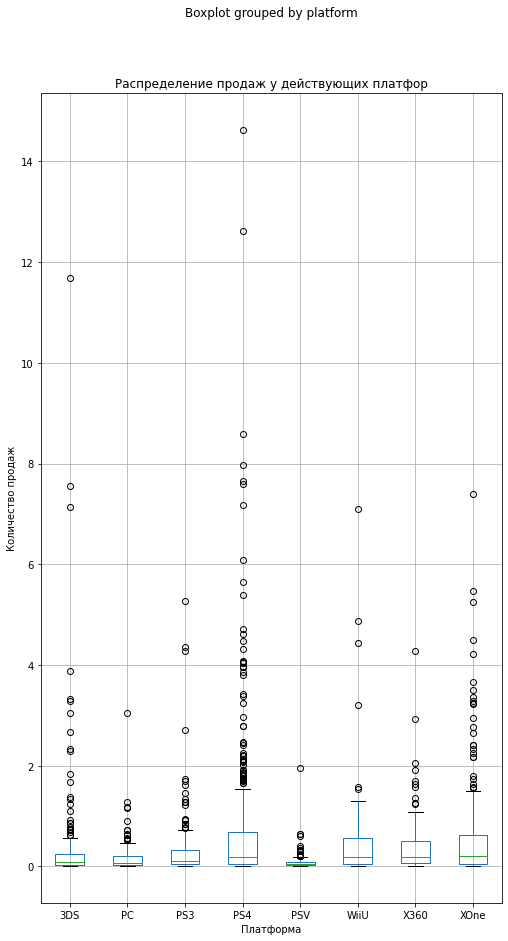

In [ ]:
df.query('platform in @platforms').boxplot(column='total_sales', by='platform', figsize=(8, 15))
plt.title('Распределение продаж у действующих платфор')
plt.ylabel('Количество продаж')
plt.xlabel('Платформа')
plt.show()

В данных очень много больших выбросов вверх, поэтому ограничим y на графике:

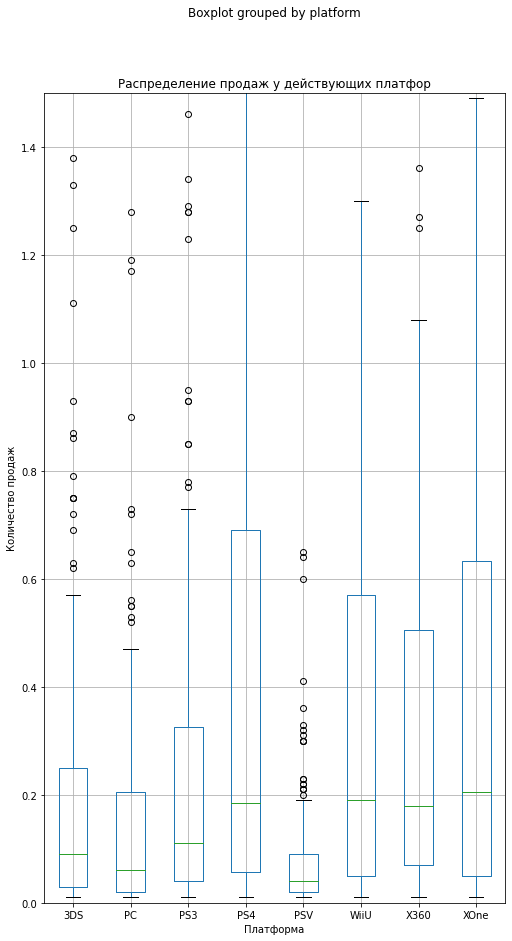

In [ ]:
df.query('platform in @platforms').boxplot(column='total_sales', by='platform', figsize=(8, 15))
plt.ylim((0, 1.5))
plt.title('Распределение продаж у действующих платфор')
plt.ylabel('Количество продаж')
plt.xlabel('Платформа')
plt.show()

Среднее значение только у WiiU превышает 200000

In [ ]:
df[['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,total_sales,na_sales,eu_sales,jp_sales,other_sales
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,0.431644,0.167981,0.159821,0.055444,0.048398
std,1.058150,0.446832,0.467742,0.212100,0.142148
min,0.010000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,0.000000,0.000000,0.000000,0.000000
50%,0.100000,0.020000,0.020000,0.010000,0.010000
75%,0.350000,0.120000,0.120000,0.050000,0.040000
max,14.630000,6.030000,6.310000,3.180000,2.380000


In [ ]:
print(f'na sales: {df.na_sales.sum()}')
print(f'eu sales: {df.eu_sales.sum()}')
print(f'jp sales: {df.jp_sales.sum()}')
print(f'other sales: {df.other_sales.sum()}')

na sales: 282.03999999999996
eu sales: 268.34000000000003
jp sales: 93.09
other sales: 81.25999999999999


В среднем наибольшее число продаж в Америке (137000), затем идёт Европа (133000). Огромное число игр набираю ничтожно малое количество продаж во всех странах. Довольно много выбросов вверх во всех странах. Суммарное число продаж также наибольшее в Америке (151млн), затем Европа (147млн), после с большим отставанием Япония и другие страны.

Отзывы

Для анализа отзывов возьмём 5 самых популярных платформ за обозреваемый период.

In [ ]:
top_platforms = df.groupby("platform", as_index=False).agg({"total_sales":"sum"}).sort_values('total_sales', ascending=False).head(5)['platform']
top_platforms

3     PS4
8    XOne
0     3DS
2     PS3
7    X360
Name: platform, dtype: object

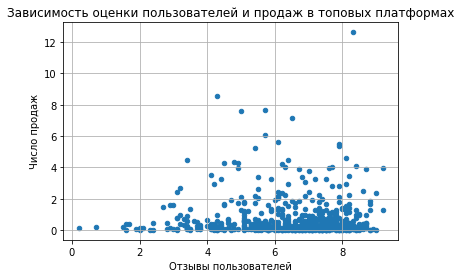

In [ ]:
df.query('platform in @top_platforms').plot(x='user_score', y='total_sales', kind='scatter', title='Зависимость оценки пользователей и продаж в топовых платформах', ylabel='Число продаж', xlabel='Отзывы пользователей', grid=True)
plt.show()

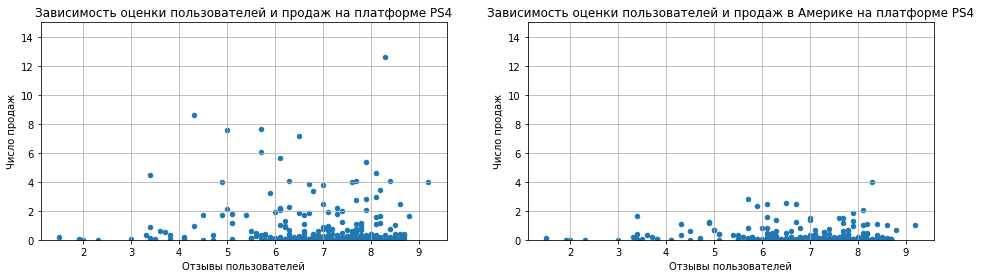

Коэффициент корреляции для PS4
             user_score  total_sales
user_score     1.000000    -0.040132
total_sales   -0.040132     1.000000


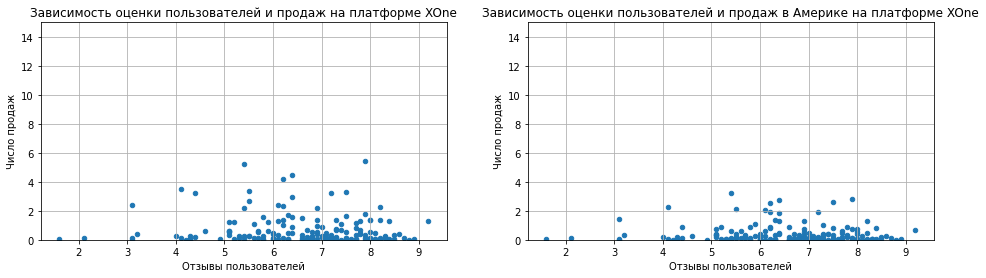

Коэффициент корреляции для XOne
             user_score  total_sales
user_score     1.000000    -0.070384
total_sales   -0.070384     1.000000


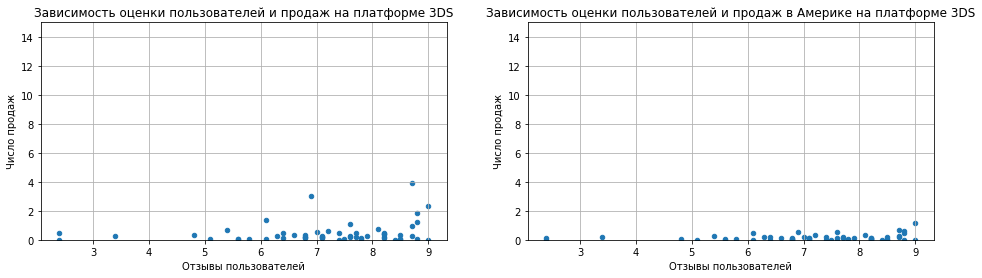

Коэффициент корреляции для 3DS
             user_score  total_sales
user_score     1.000000     0.215193
total_sales    0.215193     1.000000


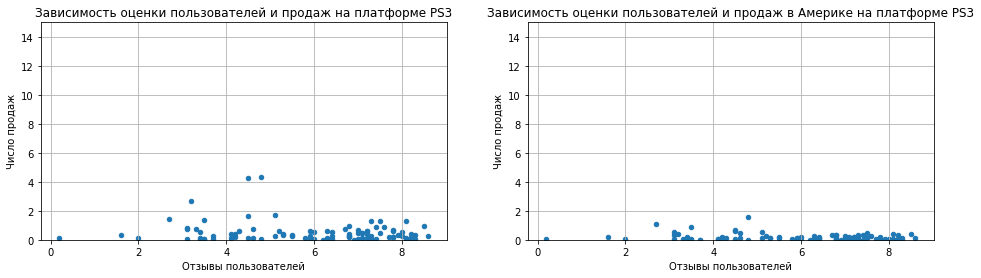

In [ ]:
for platform in top_platforms:
    fig, axes = plt.subplots(1, 2)
    df.query('platform == @platform').plot(ax=axes[0], figsize=(16, 4), x='user_score', y='total_sales', kind='scatter', title=f'Зависимость оценки пользователей и продаж на платформе {platform}', ylim=(0, 15), ylabel='Число продаж', xlabel='Отзывы пользователей', grid=True)
    df.query('platform == @platform').plot(ax=axes[1], figsize=(16, 4), x='user_score', y='na_sales', kind='scatter', title=f'Зависимость оценки пользователей и продаж в Америке на платформе {platform}', ylim=(0, 15), ylabel='Число продаж', xlabel='Отзывы пользователей', grid=True)
    plt.show()
    print(f'Коэффициент корреляции для {platform}')
    print(df.query("platform == @platform")[["user_score", "total_sales"]].corr())

Графики достаточно похожи и между платформами и между общими продажами и продажами в Америке. Корреляция низкая. Видимо это связано с тем, что большинтсво игр имеет до 1млн продаж. Однако на графиках видно, что игры с большим рейтингом до 8 с большей вероятностью будут лучше продаваться

In [ ]:
df.boxplot('user_score')
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки пользователей')
plt.show()

Как мы видели из графиков выше, оценка ниже трёх - выброс

In [ ]:
for platform in top_platforms:
    fig, axes = plt.subplots(1, 2)
    df.query('platform == @platform').plot(ax=axes[0], figsize=(16, 4), x='critic_score', y='total_sales', kind='scatter', title=f'Зависимость оценки критиков и продаж на платформе {platform}', ylim=(0, 15), ylabel='Число продаж', xlabel='Оценки критиков', grid=True)
    df.query('platform == @platform').plot(ax=axes[1], figsize=(16, 4), x='critic_score', y='na_sales', kind='scatter', title=f'Зависимость оценки критиков и продаж в Америке на платформе {platform}', ylim=(0, 15), ylabel='Число продаж', xlabel='Оценки критиков', grid=True)
    plt.show()
    print(f'Коэффициент корреляции для {platform}')
    print(df.query("platform == @platform")[["critic_score", "total_sales"]].corr())

In [ ]:
df[(df.platform == 'PS3') & (df.critic_score.notna())]

In [ ]:
print('Число строк', df.shape[0])
print('Число игр на платформе PS3', df[df.platform =='PS3'].shape[0])

Видимо платформа PS3 устарела, и критики на ней не оценивают новые игры

In [ ]:
df.boxplot('critic_score')
plt.title('Распределение оценок критиков')
plt.ylabel('Оценки критиков')
plt.show()

In [ ]:
df.query('platform in @top_platforms').plot(x='critic_score', y='total_sales', kind='scatter', title='Зависимость оценки критиков и продаж в топовых платформах', ylabel='Число продаж', xlabel='Оценки критиков', grid=True)
plt.show()
df[['total_sales', 'critic_score']].corr()

Наибольшая корреляция продаж с отзывами критиков у XOne (0.43), наименьшая (кроме PS3) у 3DS (0.17). Общая корреляция - 0.33.

попытаемся понять разницу между оценками критиков и пользователей

In [ ]:
df.query('platform in @top_platforms').plot(x='critic_score', y='user_score', kind='scatter', title='Зависимость оценки критиков и пользователей', ylabel='Оценка пользователей', xlabel='Оценка критиков', grid=True)
plt.show()
df[['user_score', 'critic_score']].corr()

In [ ]:
df[(df.critic_score.isna()) & (df.user_score > 8)]

In [ ]:
print("Число пропусков в оценке критиков", df.critic_score.isna().sum())

In [ ]:
print('Число пропусков в оценке пользователей', df.user_score.isna().sum())

In [ ]:
print('Общее число пропусков в оценках', df[(df.critic_score.isna()) & (df.user_score.isna())].shape[0])

In [ ]:
print('Общее число пропусков в оценках для игр, которые продавались в Японии', df[(df.critic_score.isna()) & (df.user_score.isna()) & (df.jp_sales > 0)].shape[0])

Между оценками критиков и пользователей есть небольшая положительная корреляция. Игр без отзывов критиков и пользователей примерно одинаковое число. У большей части из них отсутствуют как оценки критиков так и оценки пользователей

In [ ]:
df.genre.value_counts().plot.bar()
plt.title('Количество игр по жанрам')
plt.ylabel('Количество')
plt.xlabel('Жанры')
plt.show()

In [ ]:
df.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales').plot.bar()
plt.title('Суммарное число продаж по жанрам')
plt.xlabel('Число продаж')
plt.ylabel('Жанр')
plt.show()

Видим, что Action лидирует по числу игр, а вот по числу продаж его незначительно опрежает Shooter. Но посмотрим, какой жанр лучше в среднем по числу продаж

In [ ]:
df.groupby('genre').agg({'total_sales':'mean'}).sort_values('total_sales').plot.bar(grid=True)
plt.title('Зависимость среднего числа продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Среднее число продаж')
plt.show()

In [ ]:
df.groupby('genre').agg({'total_sales':'median'}).sort_values('total_sales').plot.bar(grid=True)
plt.title('Зависимость среднего числа продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианное число продаж')
plt.show()

Игр жанра Shooter не так много, но в среднем они продаются лучше остальных. Также высокие средние показатели у Role-Playing, Sports и Action. Низкие продажи у Advanture, Puzzle, Strategy. Action где-то в середине. По медианному же значению Shooter далеко впереди, затем идут Sports и Role-Playing

In [ ]:
sns.set(rc={'figure.figsize':(11, 11)})

In [ ]:
df.boxplot(column='total_sales', by='genre')
plt.ylim((0, 4))
plt.title('Распределение продаж у действующих платфор по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанр')
plt.show()

In [ ]:
df.boxplot(column='total_sales', by='genre')
plt.ylim((0, 1.5))
plt.xticks(rotation=45)
plt.title('Распределение продаж у действующих платфор по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанр')
plt.show()

In [ ]:
sns.scatterplot(data=df.query('platform in @top_platforms'), x='critic_score', y='total_sales', hue='genre')
plt.title('Зависимость оценки критиков и продаж в топовых платформах')
plt.ylabel('Число продаж')
plt.xlabel('Оценки критиков')
plt.show()

Рассмотрим доли продаж в разных странах по разным категориям. Будем рассматривать три показателя - сумму, среднее и медиану. Большое число скачиваний может быть за счёт большого числа игр с низким скачивание, для интернет магазина такие игры вряд ли интересны. Среднее и медиану мы берём потому что стратегия далее может быть построена разной; если нам важно учитывать игры, которые будут хитами, то нас интересует среднее, однако если мы не умеем определять хиты и нас интересует общие хорошие показатели, то медиана нам подойдёт больше, поскольку менее чувствительна к выбросам

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("platform").agg({"na_sales":"sum"}).sort_values('na_sales', ascending=False).head(5).plot(title='Распределение платформ в Америке', ylabel='Суммарное число продаж', ax=axes[0], y='na_sales', kind='pie', autopct='%1.0f%%')
df.groupby("platform").agg({"na_sales":"mean"}).sort_values('na_sales', ascending=False).head(6).plot(title='Распределение платформ в Америке', ylabel='Среднее число продаж', ax=axes[1], y='na_sales', kind='pie', autopct='%1.0f%%')
gf = 100 * df.groupby("platform").agg({"na_sales":"median"}).sort_values('na_sales', ascending=False)
gf.head(6).plot(title='Распределение платформ в Америке', ylabel='Медианное число продаж', y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("platform").agg({"eu_sales":"sum"}).sort_values('eu_sales', ascending=False).head(5).plot(title='Распределение платформ в Европе', ylabel='Суммарное число продаж', ax=axes[0], y='eu_sales', kind='pie', autopct='%1.0f%%')
gf = df.groupby("platform").agg({"eu_sales":"mean"}).sort_values('eu_sales', ascending=False) * 100
gf.head(7).plot(title='Распределение платформ в Европе', ylabel='Среднее число продаж', ax=axes[1], y='eu_sales', kind='pie', autopct='%1.0f%%')
gf = df.groupby("platform").agg({"eu_sales":"median"}).sort_values('eu_sales', ascending=False) * 100
gf.head(5).plot(title='Распределение платформ в Европе', ylabel='Медианное число продаж', y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("platform").agg({"jp_sales":"sum"}).sort_values('jp_sales', ascending=False).head(5).plot(title='Распределение платформ в Японии', ylabel='Суммарное число продаж', ax=axes[0], y='jp_sales', kind='pie', autopct='%1.0f%%')
gf = 100 * df.groupby("platform").agg({"jp_sales":"mean"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение платформ в Японии', ylabel='Среднее число продаж', ax=axes[1], y='jp_sales', kind='pie', autopct='%1.0f%%')
gf = 100 * df.groupby("platform").agg({"jp_sales":"median"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение платформ в Японии', ylabel='Медианное число продаж', y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

Раньше PSV нигде не появлялась в топах, а в Японии по медиане она на втором месте. Взгляним

In [ ]:
df[df.platform == 'PSV']

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("platform").agg({"other_sales":"sum"}).sort_values('other_sales', ascending=False).head(5).plot(title='Распределение платформ в других странах', ylabel='Суммарное число продаж', ax=axes[0], y='other_sales', kind='pie', autopct='%1.0f%%')
gf = 100 * df.groupby("platform").agg({"other_sales":"mean"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение платформ в других странах', ylabel='Среднее число продаж', ax=axes[1], y='other_sales', kind='pie', autopct='%1.0f%%')
gf = 100 * df.groupby("platform").agg({"other_sales":"median"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение платформ в других странах', ylabel='Медианное число продаж', y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

В Америке по суммарному числу скачиваний лидирует PS4 (45%), затем идёт XOne(35%), остальные три популярные платформы занимают по 6%, однако по среднему лидирует XOne (29%), а PS4 и WiiU занимают по 21%. В Европе существенную долю рынка занимает PS4(62%), XOne(21%). В среднем PS4 также лидирует, но уже с 32%, у XOne - 19%, а WiiU обладает 17%. Другие страны по распределению достаточно близки к Европе. В Японии же лидирует 3DS (44% в общем и 40% в среднем), 22% в среднем у WiiU, а PS4 в среднем показывает примерно как PS3.
По медиане в Америке лидирует WiiU (38%), затем идут XOne (29%) и X360 (23%). В Европе также лидирует WiiU (30%), по 20% у PS4 и XOne. В Японии по медианному значению лидируют 3DS и PSV. В других странах первое место делят WiiU и PS4 - по 33%

Видимо PS и X - занимают Европейский и Американские рынки (как следствие - мировой), а DS, PSV - Японская платформа

Рассмотрим жанры по странам

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("genre").agg({"na_sales":"sum"}).sort_values('na_sales', ascending=False).head(5).plot(title='Распределение жанров в Америке', ylabel='Суммарное число продаж', ax=axes[0], y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"na_sales":"mean"}).sort_values('na_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Америке', ylabel='Среднее число продаж', ax=axes[1], y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"na_sales":"median"}).sort_values('na_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Америке', ylabel='Медианное число продаж', y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("genre").agg({"eu_sales":"sum"}).sort_values('eu_sales', ascending=False).head(5).plot(title='Распределение жанров в Европе', ylabel='Суммарное число продаж', ax=axes[0], y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"eu_sales":"mean"}).sort_values('eu_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Европе', ylabel='Среднее число продаж', ax=axes[1], y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"eu_sales":"median"}).sort_values('eu_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Европе', ylabel='Медианное число продаж', y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("genre").agg({"jp_sales":"sum"}).sort_values('jp_sales', ascending=False).head(5).plot(title='Распределение жанров в Японии', ylabel='Суммарное число продаж', ax=axes[0], y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"jp_sales":"mean"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Японии', ylabel='Среднее число продаж', ax=axes[1], y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"jp_sales":"median"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в Японии', ylabel='Медианное число продаж', y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("genre").agg({"other_sales":"sum"}).sort_values('other_sales', ascending=False).head(5).plot(title='Распределение жанров в других странах', ylabel='Суммарное число продаж', ax=axes[0], y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"other_sales":"mean"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в других странах', ylabel='Среднее число продаж', ax=axes[1], y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("genre").agg({"other_sales":"median"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение жанров в других странах', ylabel='Медианное число продаж', y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

В Америке, Европе и других странах по всем показателям лидирует Shooters (у него достаточно значимый отрыв по медиане). По количеству игр на втором месте идёт Action, но по среднему и медиане он не входит в топ-5. По среднему на втором месте находится Sports. По медианному значению Sports также один из лидеров, но (кроме Shooter) доли у жанров-лидиров примерно одинаковые. В Японии половину рынка скачиваний занимает Action, а вот по среднему лидирует Role-playing (26%) и Puzzle (19%). По медиане же у Role-Playing 38%, а вот на втором месте Fighting (23%).

Рассмотрим рейтинг по странам

In [ ]:
ratings = ['AO', 'EC', 'RP']
df.query('rating in @ratings').shape[0]

Игр с категорией ЕС (для детей младшего возраста), АО (с 18 лет) и RP (рейтинг ожидается) суммарно 11. Ожидаемо, производители игр хотят попасть в категорию как можно шире. Расммотрим диаграммы без них.

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("rating").agg({"na_sales":"sum"}).sort_values('na_sales', ascending=False).head(5).plot(title='Распределение рейтинга в Америке', ylabel='Суммарное число продаж', ax=axes[0], y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"na_sales":"mean"}).sort_values('na_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Америке', ylabel='Среднее число продаж', ax=axes[1], y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"na_sales":"median"}).sort_values('na_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Америке', ylabel='Медианное число продаж', y='na_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("rating").agg({"eu_sales":"sum"}).sort_values('eu_sales', ascending=False).head(5).plot(title='Распределение рейтинга в Европе', ylabel='Суммарное число продаж', ax=axes[0], y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"eu_sales":"mean"}).sort_values('eu_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Европе', ylabel='Среднее число продаж', ax=axes[1], y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"eu_sales":"median"}).sort_values('eu_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Европе', ylabel='Медианное число продаж', y='eu_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("rating").agg({"jp_sales":"sum"}).sort_values('jp_sales', ascending=False).head(5).plot(title='Распределение рейтинга в Японии', ylabel='Суммарное число продаж', ax=axes[0], y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"jp_sales":"mean"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Японии', ylabel='Среднее число продаж', ax=axes[1], y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"jp_sales":"median"}).sort_values('jp_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в Японии', ylabel='Медианное число продаж', y='jp_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

В Японии медианные значения скачиваний по рейтингу пустые. Посмотрим, в чём дело

In [ ]:
df.groupby("rating").agg({"jp_sales":"median"}).sort_values('jp_sales', ascending=False)

In [ ]:
df[(df.jp_sales > 0) & (df.rating.notna())].shape[0]

In [ ]:
df[df.jp_sales > 0].shape[0]

Видимо в Японии система рейтингов не прижилась

In [ ]:
fig, axes = plt.subplots(1, 2)
df.groupby("rating").agg({"other_sales":"sum"}).sort_values('other_sales', ascending=False).head(5).plot(title='Распределение рейтинга в других странах', ylabel='Суммарное число продаж', ax=axes[0], y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"other_sales":"mean"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в других странах', ylabel='Среднее число продаж', ax=axes[1], y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(16, 8))
gf = 100 * df.groupby("rating").agg({"other_sales":"median"}).sort_values('other_sales', ascending=False)
gf.head(6).plot(title='Распределение рейтинга в других странах', ylabel='Медианное число продаж', y='other_sales', kind='pie', autopct='%1.0f%%', figsize=(6, 6))
plt.show()

Во всех странах наиболее популярная категория по всем показателям -M (для взрослых), затем идут Е и E10+(вполне ожидаемо, ведь эти игры подходят всем). В Японии же на первом месте по популярности идут игры с рейтингом Т (для подростков), дальше идут E и E10+, и только потом М.

5.

Проверим гипотезу
$H_0$: среднее пользовательских рейтингов для платформ XOne и PC одинаковые; $H_1$: среднее пользовательских рейтингов для платформ XOne и PC различаются; Уровень значимости 5%

In [ ]:
results = st.ttest_ind(df[(df.platform == 'PC') & (df.user_score.notna())]['user_score'], df[(df.platform == 'XOne') & (df.user_score.notna())]['user_score'])

print('p-значение:', results.pvalue)

Вывод: гипотеза о равенстве средних значений пользовательского рейтинга для XOne и PC не отвергается в пользу альтернативной о неравенстве на уровне значимости 5%

In [ ]:
print('Среднее для PC', df[df.platform == 'PC'].user_score.mean())

In [ ]:
print('Среднее для XOne', df[df.platform == 'XOne'].user_score.mean())

In [ ]:
df[(df.platform == 'XOne') | (df.platform == 'PC')].hist(bins=40, column='user_score', by='platform')
plt.ylabel('Число оценок')
plt.xlabel('Оценка')
plt.show()

Проверим гипотезу
$H_0$: среднее пользовательских рейтингов для жанров Action и Sports одинаковые; $H_1$: среднее пользовательских рейтингов для жанров Action и Sports различаются; Уровень значимости 5%

In [ ]:
results = st.ttest_ind(df[(df.genre == 'Action') & (df.user_score.notna())]['user_score'], df[(df.genre == 'Sports') & (df.user_score.notna())]['user_score'])

print('p-значение:', results.pvalue)

Вывод: нуливая гипотеза о равенстве средних пользовательских рейтингов отвергается в пользу альтернативной о неравентсва на уровне значимости 5%

In [ ]:
print('Среднее для Action', df[df.genre == 'Action'].user_score.mean())

In [ ]:
print('Среднее для Sports', df[df.genre == 'Sports'].user_score.mean())

In [ ]:
df[(df.genre == 'Action') | (df.genre == 'Sports')].hist(bins=40, column='user_score', by='genre')
plt.ylabel('Число оценок')
plt.xlabel('Оценка')
plt.show()

6.

Предобработка
- были удалены две строки с пропусками названия игры и жанра
- год игры переведён в целое число. Часть пропусков с годом игры было заменено на медианное значение по другим строчкам с этой игрой
- из возростного рейтинга K-A было заменено на E, было убрано часть пропусков на одно из значений игр с таким же названием
- в пользовательском рейтинге tbd был заменен на None, рейтинг был переведен в числовой формат
- рейтинг критиков был переведён в целые числа

Данные сначала были ограничены 25%-персентилем по созданию игр (2003) год. Средняя продолжительность жизни платформ с таким ограничением - 7 лет. Далее, поскольку игровые тренды очень быстро меняются, рассматривались данные за последние два года. Скачивания игр слабо коррелируют с отзывами пользователей, но достаточно неплохо с отзывами критиков (0.33). Вообще пользовательские оценки редко бывают ниже 3, а критиков - ниже 40. Отзывы критиков и пользователей коррелируют между собой (0.44).

Выводы по категориям:
- В среднем наибольшее число продаж в Америке (221000), затем идёт Европа (136000). Огромное число игр набираю ничтожно малое количество продаж во всех странах. Довольно много выбросов вверх во всех странах. Суммарное число продаж также наибольшее в Америке (2573млн), затем Европа (1579млн), после с большим отставанием Япония и другие страны.
- Игр жанра Shooter не так много, но в среднем они продаются лучше остальных. Также высокие средние показатели у Role-Playing, Sports и Action. Низкие продажи у Advanture, Puzzle, Strategy. Action где-то в середине. По медианному же значению Shooter далеко впереди, затем идут Sports и Role-Playing
- В Америке по суммарному числу скачиваний лидирует PS4 (45%), затем идёт XOne(35%), остальные три популярные платформы занимают по 6%, однако по среднему лидирует XOne (29%), а PS4 и WiiU занимают по 21%. В Европе существенную долю рынка занимает PS4(62%), XOne(21%). В среднем PS4 также лидирует, но уже с 32%, у XOne - 19%, а WiiU обладает 17%. Другие страны по распределению достаточно близки к Европе. В Японии же лидирует 3DS (44% в общем и 40% в среднем), 22% в среднем у WiiU, а PS4 в среднем показывает примерно как PS3. По медиане в Америке лидирует WiiU (38%), затем идут XOne (29%) и X360 (23%). В Европе также лидирует WiiU (30%), по 20% у PS4 и XOne. В Японии по медианному значению лидируют 3DS и PSV. В других странах первое место делят WiiU и PS4 - по 33%. Видимо PS и X - занимают Европейский и Американские рынки (как следствие - мировой), а DS, PSV - Японская платформа
- В Америке, Европе и других странах по всем показателям лидирует Shooters (у него достаточно значимый отрыв по медиане). По количеству игр на втором месте идёт Action, но по среднему и медиане он не входит в топ-5. По среднему на втором месте находится Sports. По медианному значению Sports также один из лидеров, но (кроме Shooter) доли у жанров-лидиров примерно одинаковые. В Японии половину рынка скачиваний занимает Action, а вот по среднему лидирует Role-playing (26%) и Puzzle (19%). По медиане же у Role-Playing 38%, а вот на втором месте Fighting (23%).
- Во всех странах наиболее популярная категория по всем показателям -M (для взрослых), затем идут Е и E10+(вполне ожидаемо, ведь эти игры подходят всем). В Японии же на первом месте по популярности идут игры с рейтингом Т (для подростков), дальше идут E и E10+, и только потом М.

Гипотезы:
- гипотеза о равенстве средних значений пользовательского рейтинга для XOne и PC не отвергается в пользу альтернативной о неравенстве на уровне значимости 5%.
- нуливая гипотеза о равенстве средних пользовательских рейтингов для жанров Action и Sports отвергается в пользу альтернативной о неравентсва на уровне значимости 5%. Среднее выше у Action

Рекомендации:
- есть относительно недавние игры с высокими выбросами по скачиванию, их всё еще можно продавать
- WiiU, PS4, XOne, 3DS (Японская) на 2016 год показывают лучшие результаты по медианному скачиваниям, по-видимому на них стоит ориентироваться в следующем году
- Япония по всем категориям довольно сильно отличается от остальных рынков. Скорее всего магазину с названием "Стримчик" не следует ориентироваться на этот рынок. Кроме этого
Далее рынки, без японского.
- жанр Shooter на первом месте по скачиваниям, среднему и медиане. Вообще при анализе неизвестной игры стоит в первую очередь ориентироваться на медиану (потому что вряд ли эта игра будет хитом, а хиты довольно сильно завышают среднее). На втором месте по медиане идёт Sports
- наиболее популярные игры по возрасту это М и Е